In [246]:
import pandas as pd
import tensorflow as tf
from tensorflow import keras
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
import numpy as np
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

Accure the data

In [215]:
df = pd.read_csv('Churn_Modelling.csv')
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


Lets see there is any empty values

In [216]:
df.isnull().sum()

RowNumber          0
CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

It's look there isn't any empty values. So lets see what data types available

In [217]:
df.dtypes

RowNumber            int64
CustomerId           int64
Surname             object
CreditScore          int64
Geography           object
Gender              object
Age                  int64
Tenure               int64
Balance            float64
NumOfProducts        int64
HasCrCard            int64
IsActiveMember       int64
EstimatedSalary    float64
Exited               int64
dtype: object

Basic describe of numerical features

In [218]:
df.describe()

,RowNumber,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,10000.00000,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,5000.50000,1.569094e+07,650.528800,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,2886.89568,7.193619e+04,96.653299,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,1.00000,1.556570e+07,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,2500.75000,1.562853e+07,584.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,5000.50000,1.569074e+07,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,7500.25000,1.575323e+07,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000
max,10000.00000,1.581569e+07,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000


about categorical features

In [219]:
df.describe(include='O')

,Surname,Geography,Gender
count,10000,10000,10000
unique,2932,3,2
top,Smith,France,Male
freq,32,5014,5457


Lets see which categories are available in each column

In [220]:
for column in df:
    if df[column].dtype == 'object':
        print(f'{column}: {df[column].unique()}')

Surname: ['Hargrave' 'Hill' 'Onio' ... 'Kashiwagi' 'Aldridge' 'Burbidge']
Geography: ['France' 'Spain' 'Germany']
Gender: ['Female' 'Male']


There is lot more unique surname values. So lets see count

In [221]:
df['Surname'].value_counts()

Smith       32
Scott       29
Martin      29
Walker      28
Brown       26
            ..
Izmailov     1
Bold         1
Bonham       1
Poninski     1
Burbidge     1
Name: Surname, Length: 2932, dtype: int64

We want to group all the surname which has less than five count 

In [222]:
df1 = df.copy()

In [223]:
surname_stats = df1['Surname'].value_counts()
surname_stats_lessthan_5 = surname_stats[surname_stats < 5]
len(surname_stats_lessthan_5)

2311

In [224]:
df1['Surname'] = df1['Surname'].apply(lambda x: 'Rare' if x in surname_stats_lessthan_5 else x)

In [225]:
df1.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Rare,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


We want to convert categorical features to numeric. So lets do that

In [226]:
df1['Gender'].replace({'Male': 1, 'Female':0}, inplace=True)

Lets get dummies for Surname and Geography columns

In [227]:
df2 = df1.copy()

In [228]:
df2 = pd.get_dummies(data=df2, columns=['Geography', 'Surname']) #, 'Surname'

In [229]:
df2.head()

,RowNumber,CustomerId,CreditScore,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,...,Surname_Yin,Surname_Yobachi,Surname_Yobachukwu,Surname_Yobanna,Surname_Young,Surname_Yu,Surname_Yuan,Surname_Zetticci,Surname_Zikoranachidimma,Surname_Zito
0,1,15634602,619,0,42,2,0.00,1,1,1,...,0,0,0,0,0,0,0,0,0,0
1,2,15647311,608,0,41,1,83807.86,1,0,1,...,0,0,0,0,0,0,0,0,0,0
2,3,15619304,502,0,42,8,159660.80,3,1,0,...,0,0,0,0,0,0,0,0,0,0
3,4,15701354,699,0,39,1,0.00,2,0,0,...,0,0,0,0,0,0,0,0,0,0
4,5,15737888,850,0,43,2,125510.82,1,1,1,...,0,0,0,0,0,0,0,0,0,0


In [230]:
df2.shape

(10000, 637)

Lets drop unwanted columns

In [231]:
df3 = df2.drop(['RowNumber', 'CustomerId'], axis=1)

In [232]:
df3.head()

,CreditScore,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,...,Surname_Yin,Surname_Yobachi,Surname_Yobachukwu,Surname_Yobanna,Surname_Young,Surname_Yu,Surname_Yuan,Surname_Zetticci,Surname_Zikoranachidimma,Surname_Zito
0,619,0,42,2,0.00,1,1,1,101348.88,1,...,0,0,0,0,0,0,0,0,0,0
1,608,0,41,1,83807.86,1,0,1,112542.58,0,...,0,0,0,0,0,0,0,0,0,0
2,502,0,42,8,159660.80,3,1,0,113931.57,1,...,0,0,0,0,0,0,0,0,0,0
3,699,0,39,1,0.00,2,0,0,93826.63,0,...,0,0,0,0,0,0,0,0,0,0
4,850,0,43,2,125510.82,1,1,1,79084.10,0,...,0,0,0,0,0,0,0,0,0,0


Now we want to scale the data

In [233]:
cols_to_scale = ['CreditScore', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'EstimatedSalary']
scaler = MinMaxScaler()

In [234]:
df3[cols_to_scale] = scaler.fit_transform(df3[cols_to_scale])

In [235]:
df3.head()

,CreditScore,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,...,Surname_Yin,Surname_Yobachi,Surname_Yobachukwu,Surname_Yobanna,Surname_Young,Surname_Yu,Surname_Yuan,Surname_Zetticci,Surname_Zikoranachidimma,Surname_Zito
0,0.538,0,0.324324,0.2,0.000000,0.000000,1,1,0.506735,1,...,0,0,0,0,0,0,0,0,0,0
1,0.516,0,0.310811,0.1,0.334031,0.000000,0,1,0.562709,0,...,0,0,0,0,0,0,0,0,0,0
2,0.304,0,0.324324,0.8,0.636357,0.666667,1,0,0.569654,1,...,0,0,0,0,0,0,0,0,0,0
3,0.698,0,0.283784,0.1,0.000000,0.333333,0,0,0.469120,0,...,0,0,0,0,0,0,0,0,0,0
4,1.000,0,0.337838,0.2,0.500246,0.000000,1,1,0.395400,0,...,0,0,0,0,0,0,0,0,0,0


Now we want to round float numbers to about 5 decimal points

In [236]:
for column in df3:
    df3[column] = round(df3[column], 5)

Split the data

In [237]:
X = df3.drop('Exited', axis='columns')
y = df3['Exited']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

X_train.shape, X_test.shape, y_train.shape, y_test.shape

((8000, 634), (2000, 634), (8000,), (2000,))

Lets build the model

In [238]:
model = keras.Sequential([
    keras.layers.Dense(634, input_shape=(634,), activation='relu'),
    keras.layers.Dense(300, activation='relu'),
    keras.layers.Dense(50, activation='relu'),
    keras.layers.Dense(1, activation='sigmoid')
])

model.compile(
    optimizer = 'adam',
    loss= 'binary_crossentropy',
    metrics = ['accuracy']
)

model.fit(X_train, y_train, epochs=15)

Epoch 1/15
250/250 [==============================] - 4s 11ms/step - loss: 0.4661 - accuracy: 0.7970
Epoch 2/15
250/250 [==============================] - 3s 11ms/step - loss: 0.3972 - accuracy: 0.8274
Epoch 3/15
250/250 [==============================] - 3s 12ms/step - loss: 0.3226 - accuracy: 0.8643
Epoch 4/15
250/250 [==============================] - 3s 12ms/step - loss: 0.2531 - accuracy: 0.8970
Epoch 5/15
250/250 [==============================] - 3s 11ms/step - loss: 0.2033 - accuracy: 0.9155
Epoch 6/15
250/250 [==============================] - 3s 12ms/step - loss: 0.1708 - accuracy: 0.9304
Epoch 7/15
250/250 [==============================] - 3s 11ms/step - loss: 0.1554 - accuracy: 0.9366
Epoch 8/15
250/250 [==============================] - 3s 12ms/step - loss: 0.1430 - accuracy: 0.9405
Epoch 9/15
250/250 [==============================] - 3s 12ms/step - loss: 0.1402 - accuracy: 0.9439
Epoch 10/15
250/250 [==============================] - 3s 11ms/step - loss: 0.1278 - accura

In [239]:
model.evaluate(X_test, y_test)

63/63 [==============================] - 1s 8ms/step - loss: 0.9755 - accuracy: 0.8180


[0.9755263328552246, 0.8180000185966492]

In [240]:
yp = model.predict(X_test)
yp

63/63 [==============================] - 1s 5ms/step


array([[4.2457655e-01],
       [2.3584290e-08],
       [3.3526424e-02],
       ...,
       [5.5141933e-02],
       [4.3731211e-03],
       [1.7116703e-01]], dtype=float32)

In [241]:
y_pred = []
for element in yp:
    if element > 0.5:
        y_pred.append(1)
    else:
        y_pred.append(0)

In [243]:
y_pred[:10]

[0, 0, 0, 0, 0, 0, 0, 0, 0, 0]

In [244]:
y_test[:10]

4215    1
7038    0
5205    0
1132    0
1792    0
9630    0
1713    0
5716    0
2904    0
3435    0
Name: Exited, dtype: int64

Text(69.0, 0.5, 'Truth')

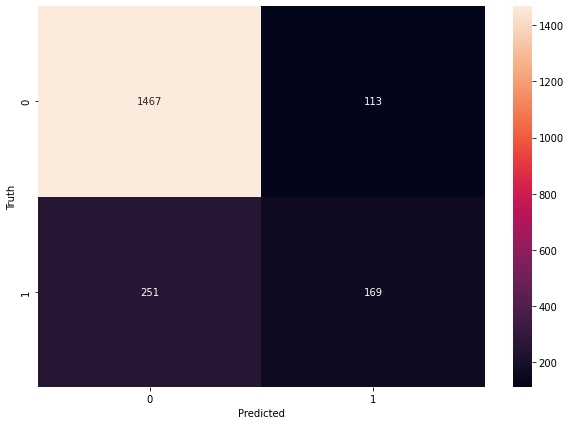

In [247]:
cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(10,7))
sns.heatmap(data=cm, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')

In [249]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.85      0.93      0.89      1580
           1       0.60      0.40      0.48       420

    accuracy                           0.82      2000
   macro avg       0.73      0.67      0.69      2000
weighted avg       0.80      0.82      0.80      2000



How precision and accuracy works

In [251]:
# accuracy
(1467+169)/(1467+113+169+251)

0.818

In [252]:
# percision 0
1467/(1467+251)

0.8538998835855646

In [253]:
# Precision 1
169/(169+113)

0.599290780141844

In [254]:
# Recall 0
1467/(1467+113)

0.9284810126582278

In [255]:
# Recall 1
169/(169+251)

0.4023809523809524